In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
basepath = 'C:/Users/roseh/Desktop/NYBG_R/'
file_location = 'data/processed/QC2/Temp_Sensors'
os.chdir(os.path.join(basepath, file_location))

In [22]:
all_temps = pd.read_csv('all_temp_sensors.csv', parse_dates = ['Date'],na_values= ' ',dtype={'Temp_F': np.float32})
all_temps.dropna(inplace=True)
all_temps['Temp_C'] = (all_temps['Temp_F'] - 32) * (5/9)
all_temps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102456 entries, 0 to 102546
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    102456 non-null  datetime64[ns]
 1   Temp_F  102456 non-null  float32       
 2   collar  102456 non-null  object        
 3   Temp_C  102456 non-null  float32       
dtypes: datetime64[ns](1), float32(2), object(1)
memory usage: 3.1+ MB


In [26]:
#all_temps['date'] = all_temps['Date'].dt.date

In [27]:
#all_temps['time'] = all_temps['Date'].dt.time

In [31]:
#all_temps['hour'] = all_temps['Date'].dt.hour

In [ ]:
# fancy way of doing above three cells
date, time, hour = zip(*[(d.date(), d.time(), d.hour) for d in all_temps['Date']])
all_temps = all_temps.assign(date=date, time=time, hour=hour)

In [35]:
all_temps.head(20)

,Date,Temp_F,collar,Temp_C,date,time,hour
0,2022-04-25 13:40:00,65.199997,BE_SV3,18.444443,2022-04-25,13:40:00,13
1,2022-04-25 13:55:00,57.400002,BE_SV3,14.111113,2022-04-25,13:55:00,13
2,2022-04-25 14:10:00,56.240002,BE_SV3,13.466668,2022-04-25,14:10:00,14
3,2022-04-25 14:25:00,56.320000,BE_SV3,13.511111,2022-04-25,14:25:00,14
4,2022-04-25 14:40:00,56.400002,BE_SV3,13.555557,2022-04-25,14:40:00,14
5,2022-04-25 14:55:00,56.549999,BE_SV3,13.638889,2022-04-25,14:55:00,14
6,2022-04-25 15:10:00,56.630001,BE_SV3,13.683334,2022-04-25,15:10:00,15
7,2022-04-25 15:25:00,56.779999,BE_SV3,13.766666,2022-04-25,15:25:00,15
8,2022-04-25 15:40:00,56.779999,BE_SV3,13.766666,2022-04-25,15:40:00,15
9,2022-04-25 15:55:00,56.860001,BE_SV3,13.811112,2022-04-25,15:55:00,15


In [33]:
collar_groups = all_temps.groupby('collar')

In [34]:
collar_groups.first()

,Date,Temp_F,Temp_C,date,time,hour
collar,,,,,,
BE_SV3,2022-04-25 13:40:00,65.199997,18.444443,2022-04-25,13:40:00,13
BE_UL1,2022-04-25 13:27:00,68.599998,20.333334,2022-04-25,13:27:00,13
BG_UL3,2022-04-25 14:13:00,73.230003,22.905558,2022-04-25,14:13:00,14
BL_ML1,2022-04-25 11:37:00,66.820000,19.344444,2022-04-25,11:37:00,11
BR_HL3,2022-04-25 12:23:00,66.360001,19.088890,2022-04-25,12:23:00,12
BT_FE2,2022-05-12 10:40:00,77.089996,25.049999,2022-05-12,10:40:00,10
BT_FE3,2022-05-12 12:36:00,78.330002,25.738892,2022-05-12,12:36:00,12
BT_FI1,2022-05-12 11:03:00,81.180000,27.322224,2022-05-12,11:03:00,11
BT_FI3,2022-05-12 12:37:00,82.419998,28.011112,2022-05-12,12:37:00,12


In [36]:
be_sv3 = collar_groups.get_group('BE_SV3')   # select one collar only

In [38]:
be_sv3_means = be_sv3.groupby(['date','hour']).agg({'Temp_C': ['mean']})    # group by date and hour and get mean of temps each hour

In [41]:
be_sv3_means= be_sv3_means.reset_index()   
be_sv3_means.head(20)

,date,hour,Temp_C
,,,mean
0,2022-04-25,13,16.277779
1,2022-04-25,14,13.543056
2,2022-04-25,15,13.756945
3,2022-04-25,16,13.747222
4,2022-04-25,17,13.552778
5,2022-04-25,18,13.361112
6,2022-04-25,19,13.104167
7,2022-04-25,20,12.813890
8,2022-04-25,21,12.545835


<AxesSubplot:xlabel='Date'>

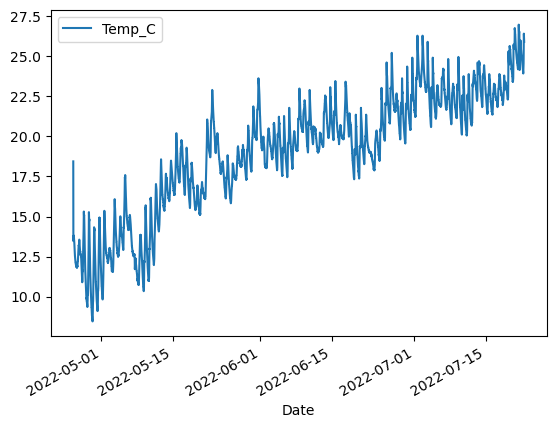

In [44]:
be_sv3.plot(x='Date',y='Temp_C')